In [1]:
import os
import cv2
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

setup_logger()

TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  1.11 ; cuda:  cu102


In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("taco_dataset", {}, "/home/josepm/dev/TACO/data/annotations.json", "/home/josepm/dev/TACO/data")
# register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/image/dir")

In [7]:
taco_dataset_metadata = MetadataCatalog.get("taco_dataset")
dataset_dicts = DatasetCatalog.get("taco_dataset")

WARNING [04/15 13:16:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/15 13:16:11 d2.data.datasets.coco]: Loaded 1500 images in COCO format from /home/josepm/dev/TACO/data/annotations.json


In [ ]:
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=taco_dataset_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    
    image = vis.get_image()[:, :, ::-1]
    fig2 = plt.figure(figsize = (15,15))
    ax = fig2.add_subplot(111)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [3]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

cfg = get_cfg()
cfg.merge_from_file(
    "../detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
cfg.DATASETS.TRAIN = ("taco_dataset",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 5000    
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 60

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[04/15 12:09:49 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (61, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (61,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (240, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (240,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (60, 256, 1

[04/15 12:09:49 d2.engine.train_loop]: Starting training from iteration 0


/home/josepm/.local/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[04/15 12:10:06 d2.utils.events]:  eta: 1:04:06  iter: 19  total_loss: 5.844  loss_cls: 4.077  loss_box_reg: 0.8357  loss_mask: 0.693  loss_rpn_cls: 0.03727  loss_rpn_loc: 0.01548  time: 0.7753  data_time: 0.0393  lr: 4.9953e-06  max_mem: 2764M
[04/15 12:10:21 d2.utils.events]:  eta: 1:03:12  iter: 39  total_loss: 5.702  loss_cls: 3.927  loss_box_reg: 0.8351  loss_mask: 0.6915  loss_rpn_cls: 0.2035  loss_rpn_loc: 0.07456  time: 0.7641  data_time: 0.0198  lr: 9.9902e-06  max_mem: 2764M
[04/15 12:10:35 d2.utils.events]:  eta: 1:01:36  iter: 59  total_loss: 5.193  loss_cls: 3.642  loss_box_reg: 0.7609  loss_mask: 0.6926  loss_rpn_cls: 0.03431  loss_rpn_loc: 0.01566  time: 0.7439  data_time: 0.0047  lr: 1.4985e-05  max_mem: 2764M
[04/15 12:10:49 d2.utils.events]:  eta: 0:59:38  iter: 79  total_loss: 4.747  loss_cls: 3.216  loss_box_reg: 0.84  loss_mask: 0.6897  loss_rpn_cls: 0.04266  loss_rpn_loc: 0.01314  time: 0.7286  data_time: 0.0039  lr: 1.998e-05  max_mem: 2764M
[04/15 12:11:03 d2.ut

In [4]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
cfg.DATASETS.TEST = ("taco_dataset", )
predictor = DefaultPredictor(cfg)

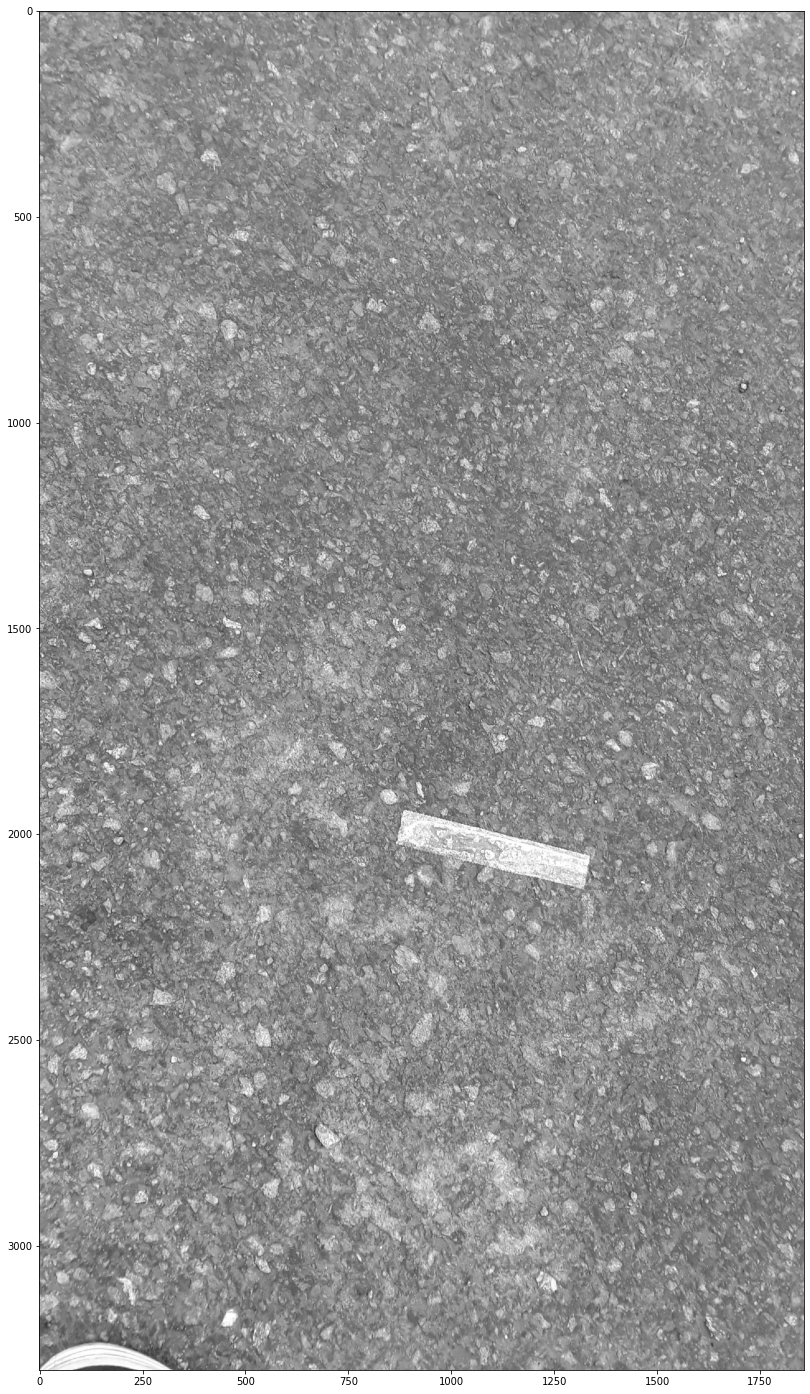

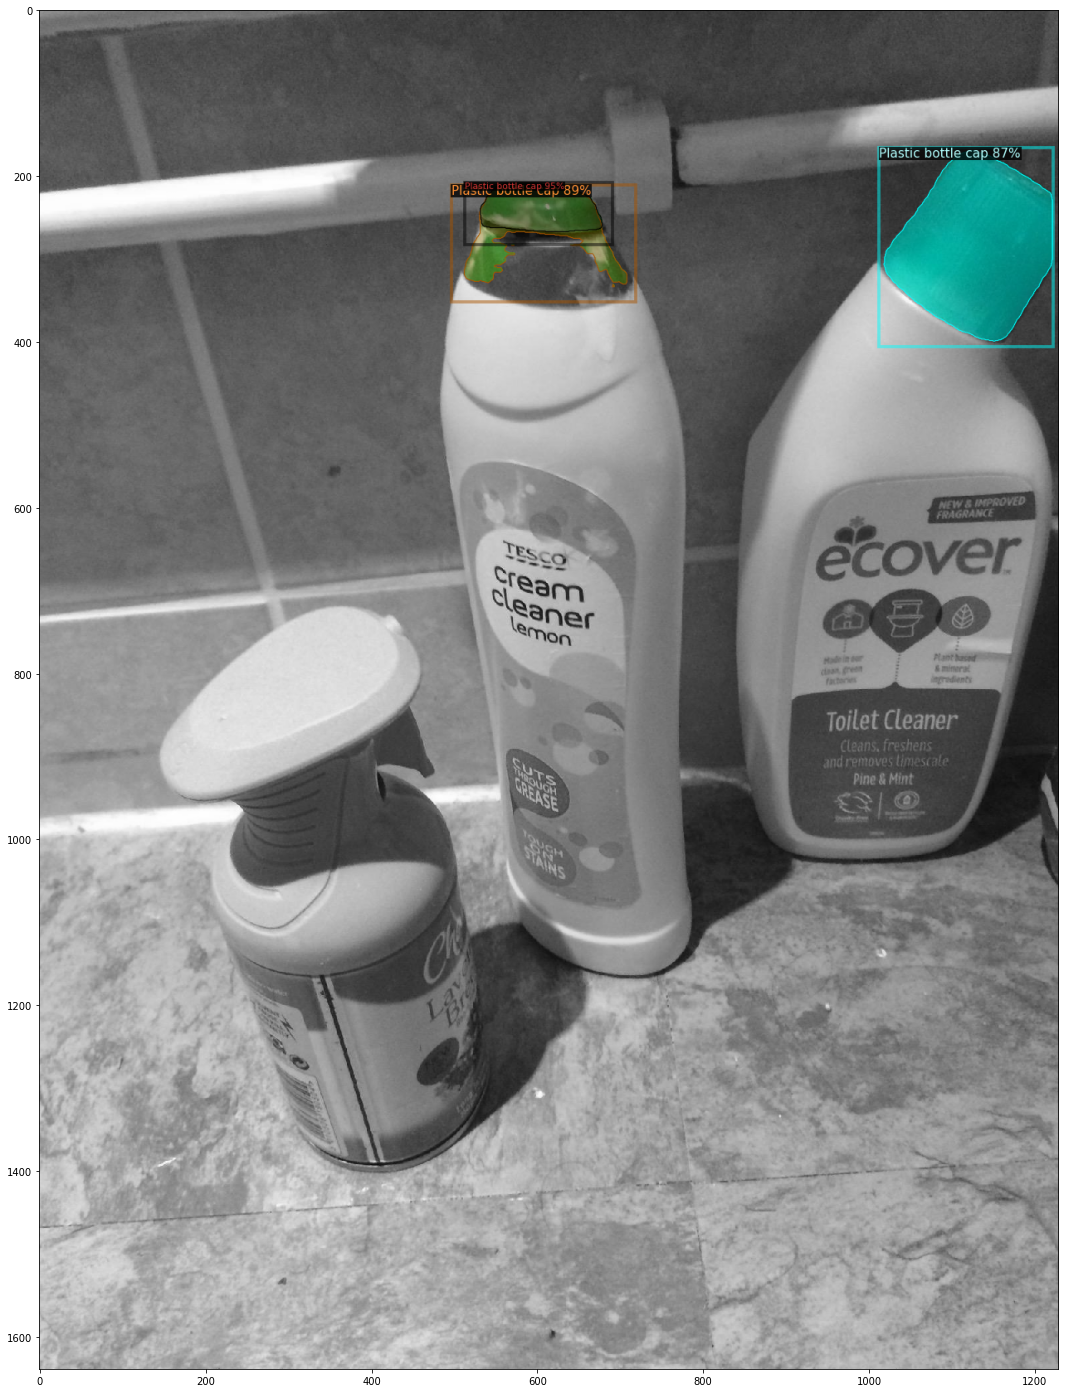

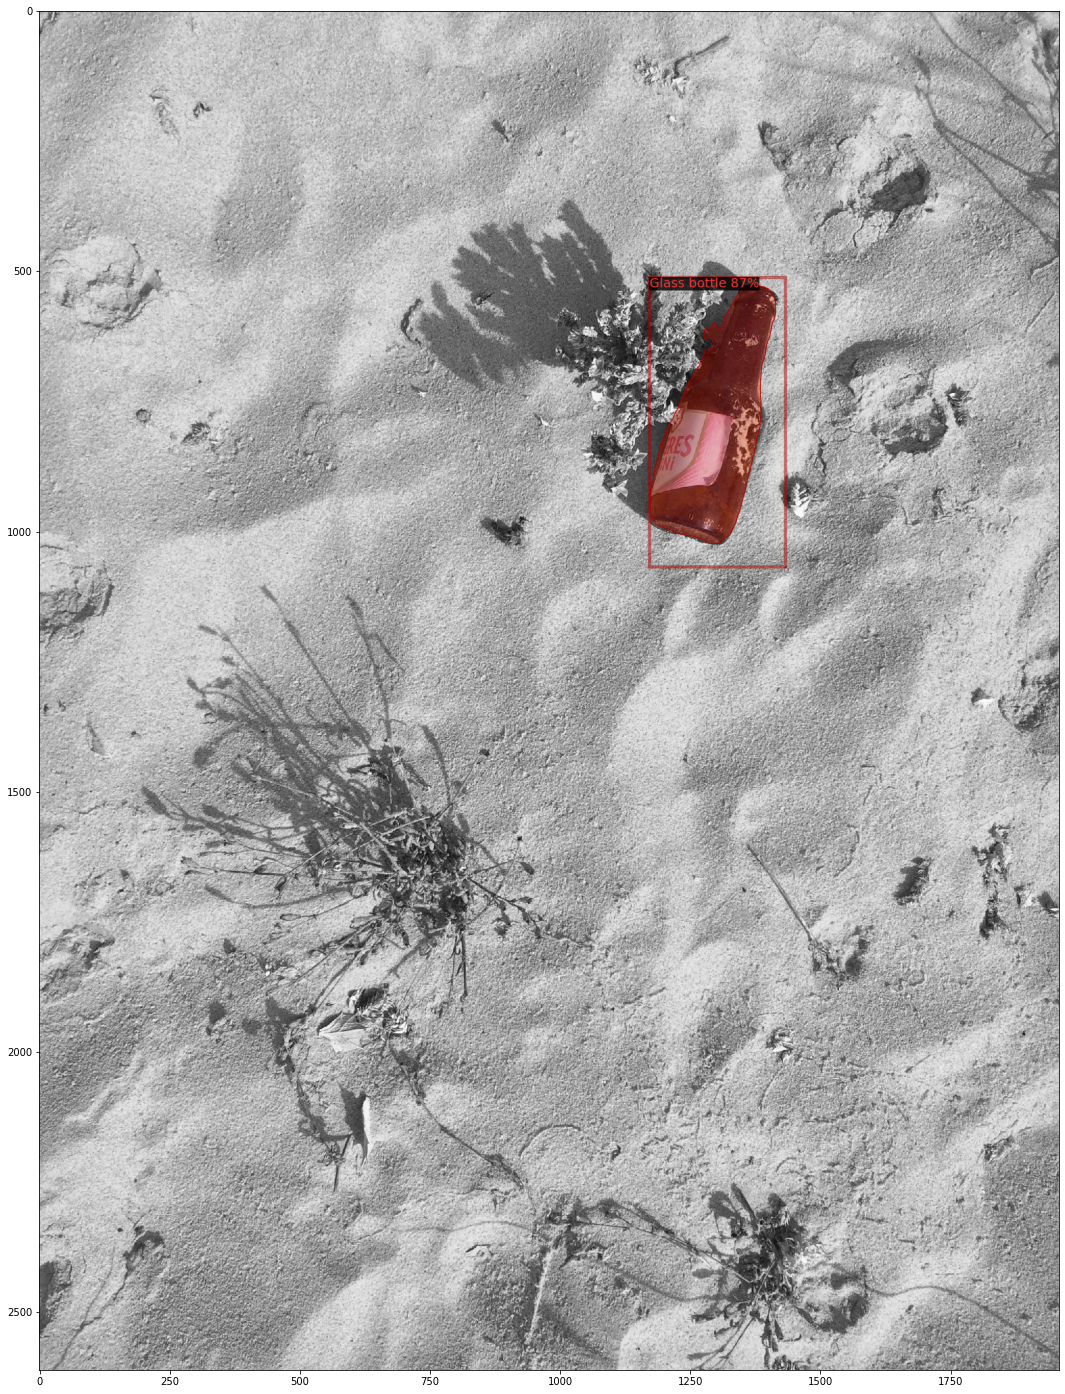

In [9]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=taco_dataset_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    image = v.get_image()[:, :, ::-1]
    fig2 = plt.figure(figsize = (25,25))
    ax = fig2.add_subplot(111)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# Refrences
https://medium.com/@chengweizhang2012/how-to-train-detectron2-with-custom-coco-datasets-4d5170c9f389

https://colab.research.google.com/drive/1DIk7bDpdZDkTTZyJbPADZklcbZKr1xkn#scrollTo=MxEIwdaJHZR8

https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=7unkuuiqLdqd